# 机器学习建议实践

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)
from public_tests_a1 import *
tf.keras.backend.set_floatx('float64')
from assigmant_utils import *
tf.autograph.set_verbosity(0)

In [3]:
X, y,x_ideal,y_ideal = gen_data(18,2,0.7)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)

In [5]:
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


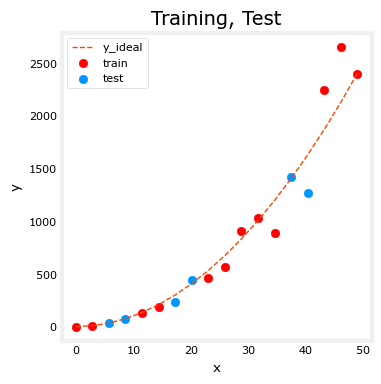

In [6]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color="orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test, color=dlc["dlblue"], label="test")
ax.legend()
plt.show()

In [7]:
def eval_mse(y, yhat):
    m = len(y)
    err = 0
    for i in range(m):
        err += (y[i] - yhat[i]) ** 2
    return err / m

In [9]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
print(eval_mse(y_tmp, y_hat))


0.010000000000000061


In [12]:
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)
print(err_train)
print(yhat.shape)

yhat_test = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat_test)
print(err_test)


58.00756048496032
(12,)
171215.01159272724


In [13]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


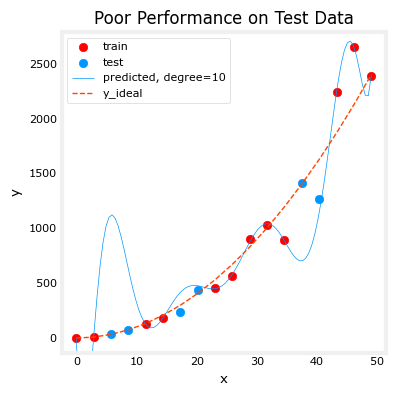

In [14]:
x=np.linspace(0,max(X),100)
yhat_pred = lmodel.predict(x)
plt_train_test(X_train, y_train, X_test, y_test, x, yhat_pred, x_ideal, y_ideal, degree)


In [15]:
X,y,x_ideal,y_ideal = gen_data(40,2,0.7)
print(X.shape, y.shape, x_ideal.shape, y_ideal.shape)

(40,) (40,) (40,) (40,)


In [17]:
X_train,X_,y_train,y_ = train_test_split(X,y,test_size=0.4,random_state=1)
print(X_train.shape, y_train.shape, X_.shape, y_.shape)

(24,) (24,) (16,) (16,)


In [18]:
X_cv,X_test,y_cv,y_test = train_test_split(X_,y_,test_size=0.5,random_state=1)
print(X_cv.shape, y_cv.shape, X_test.shape, y_test.shape)


(8,) (8,) (8,) (8,)


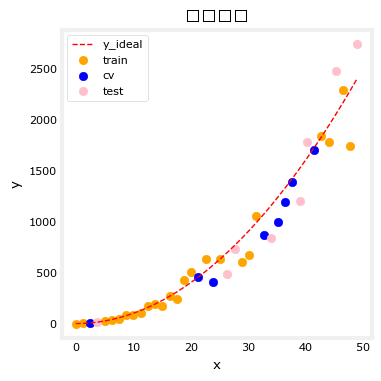

In [26]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, '--', color="red", label="y_ideal", lw=1)
ax.set_title("数据展示")
ax.set_ylabel("y")
ax.set_xlabel("x")

ax.scatter(X_train, y_train, color="orange", label="train")
ax.scatter(X_cv, y_cv, color="blue", label="cv")
ax.scatter(X_test, y_test, color="pink", label="test")
plt.legend()
plt.show()

In [31]:
max_degree =9
err_train=np.zeros(max_degree)
err_cv=np.zeros(max_degree)
x=np.linspace(0, int(X.max()), 100)
print(x.shape)
y_pred = np.zeros((100, max_degree))

(100,)


In [37]:
for i in range(max_degree):
    l_model = lin_model(i+1)
    l_model.fit(X_train, y_train)
    yhat= l_model.predict(X_train)
    err_train[i] = l_model.mse(yhat, y_train)
    yhat_cv = l_model.predict(X_cv)
    err_cv[i] = l_model.mse(yhat_cv, y_cv)
    y_pred[:,i]= l_model.predict(x)
optimal_degree = np.argmin(err_cv)+1
print(optimal_degree)

6


In [39]:
plt.close("all")

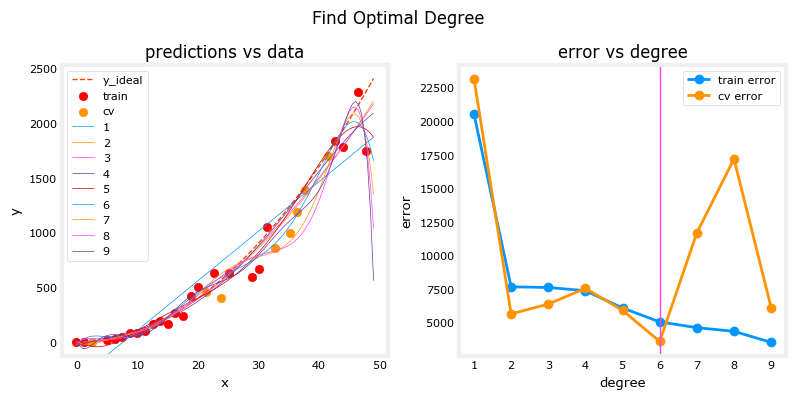

In [40]:
plt_optimal_degree(X_train, y_train,X_cv,y_cv,x,y_pred,x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)